# Explore reasons for delay

In [2]:
dataset_meta = DatasetMeta(SchemaName.FLIGHTS, FlightsDatasetName.DATASET2)
dataset = Dataset(dataset_meta)
dataset_df = dataset.load_data()

dataset_df.head()

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
65,65,NK,BOS,MYR,103,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
71,71,AA,BOS,MIA,2454,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1
104,104,B6,BOS,BWI,727,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
108,108,DL,BOS,DTW,2079,None,ON_TIME,MID_FLIGHT,NIGHT,MORNING,4,1,1
121,121,B6,BOS,PBI,721,None,ON_TIME,LONG_FLIGHT,NIGHT,MORNING,4,1,1


In [3]:
actions_lst = [
        GroupAction(grouped_column=Column('scheduled_departure'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        GroupAction(grouped_column=Column('scheduled_arrival'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        GroupAction(grouped_column=Column('origin_airport'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        BackAction(),
        BackAction(),
        FilterAction(filtered_column=Column('scheduled_trip_time'), filter_operator=FilterOperator.EQUAL,
                     filter_term='SHORT_FLIGHT'),
        GroupAction(grouped_column=Column('delay_reason'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT),
        BackAction(),
        BackAction(),
        FilterAction(filtered_column=Column('departure_delay'), filter_operator=FilterOperator.CONTAINS,
                 filter_term='LARGE_DELAY'), 
        GroupAction(grouped_column=Column('scheduled_departure'), aggregated_column=Column('flight_id'),
                    aggregation_function=AggregationFunction.COUNT)
]
    
actions_simulator = ActionsSimulator(dataset=dataset)
action_execution_result_lst = actions_simulator.run_actions(actions_lst)

### Session Tree:

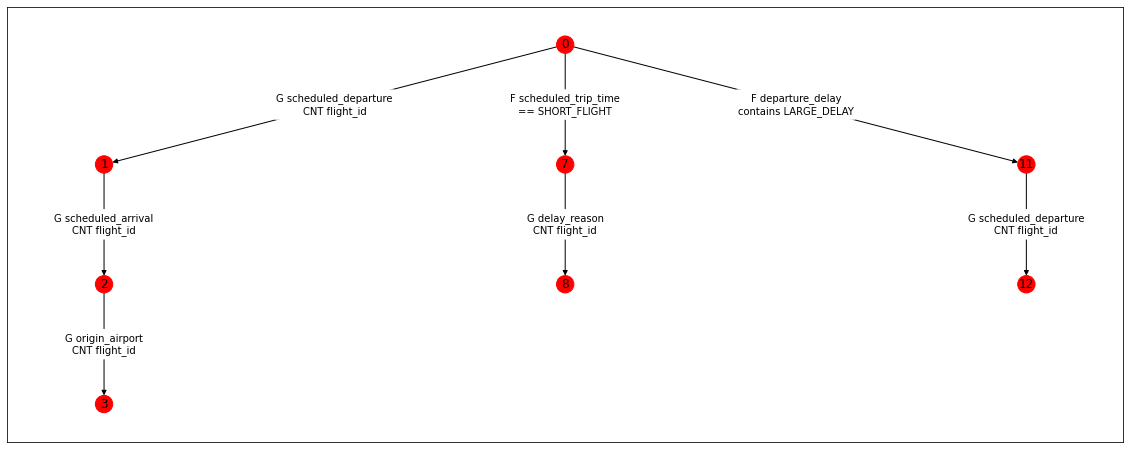

In [4]:
draw_nx_display_tree(action_execution_result_lst)

### Query 1: <span style="color:blue;">Group by scheduled_departure CNT(flight_id)</span>

In [5]:
display(prepare_display(action_execution_result_lst, 0))

,flight_id
scheduled_departure,
MORNING,3771
AFTERNOON,2899
EVENING,1255
NIGHT,247


### Query 2: <span style="color:DimGray">Group by scheduled_departure CNT(flight_id) AND</span> <span style="color:blue;">Group by scheduled_arrival CNT(flight_id)</span>

In [6]:
display(prepare_display(action_execution_result_lst, 1))

flight_id
scheduled_departure scheduled_arrival           
NIGHT               MORNING                  247
MORNING             MORNING                 2533
                    AFTERNOON               1238
EVENING             EVENING                 1201
                    NIGHT                     54
AFTERNOON           AFTERNOON               1450
                    EVENING                 1449

### Query 3: <span style="color:DimGray">Group by scheduled_departure CNT(flight_id) AND Group by scheduled_arrival CNT(flight_id) AND</span> <span style="color:blue;">Group by origin_airport CNT(flight_id)</span>

In [7]:
display(prepare_display(action_execution_result_lst, 2))

flight_id
scheduled_departure scheduled_arrival origin_airport           
NIGHT               MORNING           BOS                   247
MORNING             MORNING           BOS                  2533
                    AFTERNOON         BOS                  1238
EVENING             EVENING           BOS                  1201
                    NIGHT             BOS                    54
AFTERNOON           AFTERNOON         BOS                  1450
                    EVENING           BOS                  1449

### Query 7: <span style="color:blue;">Filter scheduled_trip_time == SHORT_FLIGHT</span>

In [8]:
display(prepare_display(action_execution_result_lst, 6))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
122,122,B6,BOS,JFK,917,None,ON_TIME,SHORT_FLIGHT,NIGHT,MORNING,4,1,1
138,138,UA,BOS,EWR,1553,None,ON_TIME,SHORT_FLIGHT,NIGHT,MORNING,4,1,1
256,256,DL,BOS,JFK,750,None,ON_TIME,SHORT_FLIGHT,MORNING,MORNING,4,1,1
469,469,AA,BOS,JFK,1165,None,ON_TIME,SHORT_FLIGHT,MORNING,MORNING,4,1,1
787,787,UA,BOS,EWR,464,None,ON_TIME,SHORT_FLIGHT,MORNING,MORNING,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465918,465918,B6,BOS,JFK,417,None,ON_TIME,SHORT_FLIGHT,AFTERNOON,AFTERNOON,6,31,2
467529,467529,B6,BOS,JFK,1317,None,ON_TIME,SHORT_FLIGHT,AFTERNOON,EVENING,6,31,2
468096,468096,AA,BOS,JFK,1096,None,SMALL_DELAY,SHORT_FLIGHT,EVENING,EVENING,6,31,2
468563,468563,B6,BOS,JFK,2017,None,ON_TIME,SHORT_FLIGHT,EVENING,EVENING,6,31,2


### Query 8: <span style="color:DimGray">Filter scheduled_trip_time == SHORT_FLIGHT AND</span> <span style="color:blue;">Group by delay_reason CNT(flight_id)</span>

In [9]:
display(prepare_display(action_execution_result_lst, 7))

,flight_id
delay_reason,
None,915
AIR_SYSTEM,183
LATE_AIRCRAFT,74
AIRLINE,52
WEATHER,19


### Query 11: <span style="color:blue;">Filter departure_delay contains LARGE_DELAY</span>

In [10]:
display(prepare_display(action_execution_result_lst, 10))

,flight_id,airline,origin_airport,destination_airport,flight_number,delay_reason,departure_delay,scheduled_trip_time,scheduled_departure,scheduled_arrival,day_of_week,day_of_month,month
909,909,B6,BOS,JAX,1109,AIRLINE,LARGE_DELAY,LONG_FLIGHT,MORNING,MORNING,4,1,1
4011,4011,B6,BOS,SEA,597,AIR_SYSTEM,LARGE_DELAY,LONG_FLIGHT,MORNING,AFTERNOON,4,1,1
6371,6371,AA,BOS,DFW,2470,AIRLINE,LARGE_DELAY,LONG_FLIGHT,AFTERNOON,AFTERNOON,4,1,1
7133,7133,B6,BOS,PBI,821,LATE_AIRCRAFT,LARGE_DELAY,LONG_FLIGHT,AFTERNOON,AFTERNOON,4,1,1
9526,9526,UA,BOS,IAH,1644,LATE_AIRCRAFT,LARGE_DELAY,LONG_FLIGHT,AFTERNOON,EVENING,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454677,454677,DL,BOS,LGA,2689,AIRLINE,LARGE_DELAY,SHORT_FLIGHT,EVENING,EVENING,5,30,5
458022,458022,US,BOS,PHL,897,AIRLINE,LARGE_DELAY,SHORT_FLIGHT,NIGHT,MORNING,6,31,2
460169,460169,WN,BOS,DEN,3465,AIRLINE,LARGE_DELAY,LONG_FLIGHT,MORNING,MORNING,6,31,2
462495,462495,DL,BOS,LGA,2675,LATE_AIRCRAFT,LARGE_DELAY,SHORT_FLIGHT,MORNING,AFTERNOON,6,31,2


### Query 12: <span style="color:DimGray">Filter departure_delay contains LARGE_DELAY AND</span> <span style="color:blue;">Group by scheduled_departure CNT(flight_id)</span>

In [11]:
display(prepare_display(action_execution_result_lst, 11))

,flight_id
scheduled_departure,
AFTERNOON,103
MORNING,71
EVENING,66
NIGHT,5
